In [30]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import matplotlib
import pickle
%matplotlib inline
import palantir
import harmony

import random
np.random.seed(0)
random.seed(0)

## Load Klein data

In [2]:

exp = np.load('Klein/expression.npy')

In [3]:
anno = pd.read_csv('Klein/anno.tsv', sep = '\t', index_col = 0)

In [4]:

genes = pd.read_csv("Klein/genes.tsv", sep='\t', header = None)[0]
barcodes = pd.read_csv("Klein/barcodes.tsv", header = None)[0]

In [5]:
counts = pd.DataFrame(exp, index = genes, columns = barcodes)
counts = counts.T
norm_df = harmony.utils.normalize_counts(counts)
hvg_genes_klein = harmony.utils.hvg_genes(norm_df, no_genes=10000)

In [6]:
counts = norm_df.T

In [7]:
mapper = pd.read_csv('Klein/Klein_xen_to_human.txt', sep = '\t')
mapper = {x:h for x, h in zip(mapper['X. Tr 9.0 gene symbol'], mapper['Matched human gene symbol'])}



In [8]:
counts.index = counts.index.map(mapper).tolist()

In [9]:
counts = counts.loc[~counts.index.isna()]

In [10]:
counts = counts[~counts.index.duplicated(keep='first')]

In [11]:
anno['Dev_group'] = anno.Developmental_stage.map(
{'Stage_8':'Blastula', 
 'Stage_10':'Gastrula', 
 'Stage_11':'Gastrula', 
 'Stage_12':'Gastrula', 
 'Stage_13':'Neurula', 
 'Stage_14':'Neurula', 
 'Stage_16':'Neurula', 
 'Stage_18':'Neurula', 
 'Stage_20':'Neurula', 
 'Stage_22':'Early tailbud'})

In [12]:
adata = sc.AnnData(counts.T)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [13]:
sc.pp.filter_genes(adata, min_cells=3)

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [14]:
adata.obs = anno

In [15]:
## Select non-neural ectoderm clusters
nne = [
'S11-ionocyte', 'S12-ionocyte', 'S13-ionocyte', 'S14-ionocyte', 'S16-ionocyte', 'S18-ionocyte', 'S20-ionocyte', 'S22-alpha ionocyte', 'S22-beta ionocyte',



'S11-ciliated epidermal progenitor', 'S12-ciliated epidermal progenitor', 'S13-ciliated epidermal progenitor', 'S14-ciliated epidermal progenitor', 'S16-ciliated epidermal progenitor', 'S18-ciliated epidermal progenitor', 'S20-ciliated epidermal progenitor', 'S22-ciliated epidermal progenitor',

'S11-goblet cell', 'S12-goblet cell', 'S13-goblet cell', 'S14-goblet cell', 'S16-goblet cell', 'S18-goblet cell', 'S20-goblet cell', 'S22-goblet cell',

'S12-cement gland primordium', 'S13-cement gland primordium', 'S14-cement gland primordium', 'S16-cement gland primordium', 'S18-cement gland primordium', 'S20-cement gland primordium', 'S22-cement gland primordium',


'S14-hatching gland', 'S16-hatching gland', 'S18-hatching gland', 'S20-hatching gland', 'S22-hatching gland',

'S14-small secretory cells', 'S16-small secretory cells', 'S18-small secretory cells', 'S20-small secretory cells', 'S22-small secretory cells',

'S10-non-neural ectoderm', 'S11-non-neural ectoderm', 'S12-non-neural ectoderm', 'S13-non-neural ectoderm',

'S14-epidermal progenitor - tp63/ctbs', 'S16-epidermal progenitor - tp63/ctbs', 'S18-epidermal progenitor - tp63/ctbs', 'S20-epidermal progenitor - tp63/ctbs', 'S22-epidermal progenitor - tp63/ctbs',

'S14-epidermal progenitor - tp63/tll2', 'S16-epidermal progenitor - tp63/tll2', 'S18-epidermal progenitor - tp63/tll2', 'S20-epidermal progenitor - tp63/tll2', 'S22-epidermal progenitor - tp63/tll2',

'S18-epidermal - aqp3',

'S18-otic placode', 'S20-otic placode', 'S22-otic placode',

'S18-placodal neuron - eya2/neurog1/neurod1', 'S20-placodal neuron - eya2/neurog1/neurod1', 'S22-placodal neuron - eya2/neurog1/neurod1',

'S18-epibranchial and lateral line placodes', 'S20-epibranchial and lateral line placodes', 'S22-epibranchial and lateral line placodes',

'S18-posterior placodal area', 'S20-posterior placodal area', 'S22-posterior placodal area',

'S18-adenohypophyseal placode', 'S20-adenohypophyseal placode', 'S22-adenohypophyseal placode',

'S13-placodal area',

'S14-anterior placodal area', 'S16-anterior placodal area', 'S18-anterior placodal area', 'S20-anterior placodal area', 'S22-anterior placodal area',

'S18-trigeminal and profundal placodes', 'S20-trigeminal and profundal placodes', 'S22-trigeminal and profundal placodes',

'S18-olfactory placode', 'S20-olfactory placode', 'S22-olfactory placode',

'S18-lens placode', 'S20-lens placode', 'S22-lens placode'
]

In [16]:
anno['Cluster_name_simple'] = [x[4:] for x in anno['Cluster_name']]

In [17]:
klein_sub_anno = anno.loc[[x in nne for x in anno.Cluster_name]]

In [18]:
adata = adata[[x in nne for x in anno.Cluster_name]]

In [19]:
adata.obs = klein_sub_anno

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [20]:
klein_c = adata.to_df()

In [ ]:
adata.obs['Cell-type'] = adata.obs['Cluster_name']
adata.obs['Dataset'] = 'Klein'

In [22]:
klein_m = adata.obs

## Load in-house animal cap data

In [23]:

def save_intermediate_files(datasets, temp_dir, file_name_template, identifier):
    for d in datasets:
        file = os.path.join('.', temp_dir, file_name_template + '_' + d.obs[identifier][0] + '.h5ad')
        d.write(file, compression='gzip')
        
identifiers = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27']
      
def load_intermediate_files(temp_dir, file_name_template, identifiers):
    ob_list = []
    for i in identifiers:
        file = os.path.join('.', temp_dir, file_name_template + '_' + i+ '.h5ad')
        ob_list.append(sc.read_h5ad(file))
    return ob_list

import sys
sys.path.append('../Integrated_analysis/')
from Integrate import concat_for_harmony, adata_to_df

timepoints = ['st08', 'st10.5', 'st12', 'st13', 'st16', 'st18', 'st20', 'st22', 'st24', 'st27']
adatas = load_intermediate_files( '/../intermediate_files', 'zUMI_raw_singlets' , timepoints)
counts = concat_for_harmony(adatas, timepoints)
norm_df = harmony.utils.normalize_counts(counts)

def adata_hvg(adata, N_genes = 1000):
    print(adata.obs.stage[0])
    counts = pd.DataFrame(data = adata.X.todense(), 
                          index = adata.obs_names,
                          columns = adata.var_names)
    norm_df = harmony.utils.normalize_counts(counts)
    hvg_genes = harmony.utils.hvg_genes(norm_df, no_genes=N_genes)
    return hvg_genes.tolist()

def flatten(ls):
    return [x for y in ls for x in y]
#hvg_genes_per_data = list(set(flatten([adata_hvg(x, N_genes = 500) for x in adatas])))

st08
st10.5
st12
st13
st16
st18
st20
st22
st24
st27
Concatenating data..


In [24]:
df = pd.read_csv('../misc_files/XENLA_XenBase20190115_prot.txt', sep = '\t', index_col = 0)
mapper = {x:h for x,h in zip(df.index, df['Unnamed: 5'])}
df_map = pd.DataFrame({'Data_name':counts.columns,
              'Reduced_name': [x.split('|')[1] for x in counts.columns]
             })
df_map['Human_name'] = df_map.Reduced_name.map(mapper)
mapper = {x:h for x, h in zip(df_map['Data_name'], df_map['Human_name'])}
#norm_df = norm_df.loc[:,hvg_genes_per_data]
norm_df.columns = [mapper[x] for x in norm_df.columns]
counts = norm_df.T
counts = counts[counts.index!= 'NoName']
counts = counts[~counts.index.isna()]
#counts = counts.reset_index().drop_duplicates(keep = 'first', subset='index').set_index('index')

#counts = counts.T
counts = counts.reset_index().groupby('index').mean()
#counts = counts.T

import pickle

with open('../intermediate_files/clusters', "rb") as f:
    clusters = pickle.load( f)

tp = pd.Series(index=norm_df.index)
for t in timepoints:
    cells = norm_df.index[norm_df.index.str.contains(t)]
    tp[cells] = t
    
anno = pd.concat([clusters, tp], axis = 1)
anno.columns = ['Clusters', 'Stage']    


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [25]:
counts = counts.T

In [26]:
anno

anno['Clusters'] = anno['Clusters'].map(str)
anno['Cell-type'] = anno['Clusters'].map({ '7': 'P1','4': 'P2','0': 'Ep1' ,'2': 'Ep2','1': 'Ep3','5':'Ep4',   
                                                              '14': 'Bc1','12': 'Bc2','6': 'Bc3','3' : 'Bc4',
                                                              '9' : 'Mcc/CCPs','10' : 'Mcc2','13' : 'Mcc3',
                                                              '11': 'Ic',
                                                              '8': 'Gc' })
anno['Dataset'] = 'In House'
anno

,Clusters,Stage,Cell-type,Dataset
st08_AAACGGGCAGTCAGCC,4,st08,P2,In House
st08_AAACCTGCAATTCCTT,4,st08,P2,In House
st08_AACCGCGAGCAGGTCA,4,st08,P2,In House
st08_AAAGATGAGATACACA,4,st08,P2,In House
st08_AACGTTGGTCGACTGC,4,st08,P2,In House
...,...,...,...,...
st27_TTTGGTTTCTTTAGGG,3,st27,Bc4,In House
st27_TTTCCTCAGAAGGTGA,3,st27,Bc4,In House
st27_TTTGCGCAGAGTGACC,3,st27,Bc4,In House
st27_TTTATGCTCAACACTG,3,st27,Bc4,In House


## Mapping

In [27]:
from EvoDevo import main 

In [28]:
spearman , de_genes = main([counts.T, klein_c.T],
               [anno,   klein_m])

Doing DE round 0.0


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Clusters' as categorical
... storing 'Stage' as categorical
... storing 'Cell-type' as categorical
... storing 'Dataset' as categorical


Doing DE round 0.1


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'InDrops_version' as categorical
... storing 'Replicate_name' as categorical
... storing 'Clutch_name' as categorical
... storing 'Library_name' as categorical
... storing 'Barcode_name' as categorical
... storing 'Developmental_stage' as categorical
... storing 'Cluster_name' as categorical
... storing 'Parent_cluster_name' as categorical
... storing 'Dev_group' as categorical
... storing 'Cluster_name_simple' as categorical
... storing 'Cell-type' as categorical
... storing 'Dataset' as categorical
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Doing DE round 1.0


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Doing DE round 1.1


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


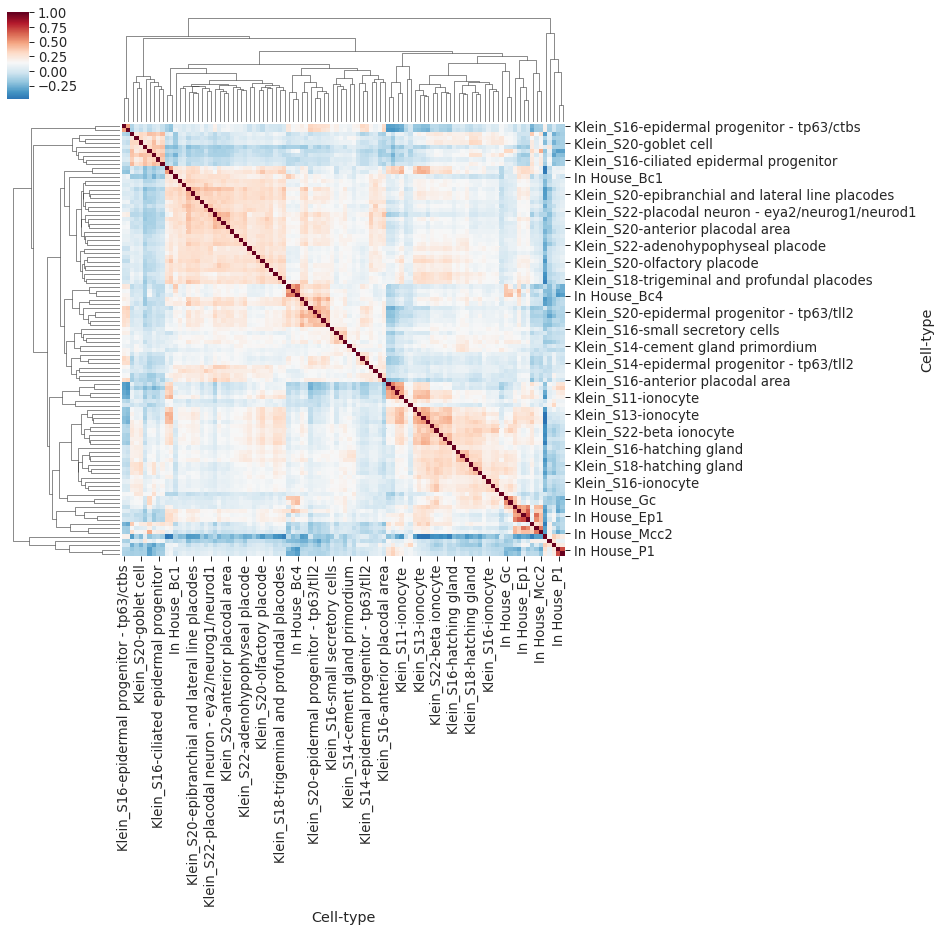

In [31]:
sns.clustermap(spearman, cmap = 'RdBu_r', center = 0.15)

In [32]:
#Cell type colors from integrated annotation
colors = [
[(0.3388235294117647, 0.7117262591311034, 0.40584390618992694),0, 2],
[(0.7371472510572856, 0.895517108804306, 0.7108342945021145),1, 4],
[(0.5573241061130334, 0.8164244521337947, 0.546958861976163),2, 3],
[(0.7364705882352941, 0.08, 0.10117647058823528),3, 9],
[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),4, 1],
[(0.8828143021914648, 0.9546943483275664, 0.8621914648212226),5, 5],
[(0.9466666666666667, 0.26823529411764707, 0.19607843137254902),6, 8],
[(0.586082276047674, 0.586082276047674, 0.586082276047674),7, 0],
[(0.996078431372549, 0.8091503267973856, 0.39607843137254906),8, 14],
[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897),9, 10],
[(0.41708573625528644, 0.6806305267204922, 0.8382314494425221),10, 11],
[(0.5513264129181085, 0.537916186082276, 0.7524490580545944),11, 13],
[(0.9874509803921568, 0.5411764705882353, 0.41568627450980394),12, 7],
[(0.1271049596309112, 0.4401845444059977, 0.7074971164936563),13, 12],
[(0.9913725490196079, 0.7913725490196079, 0.7082352941176471),14, 6]]
colors = pd.DataFrame(colors, columns = ['color', 'org_clust', 'clust_order'])

In [33]:
colors.org_clust = colors.org_clust.map(str)

In [34]:
colors.org_clust = colors.org_clust.map({ '7': 'P1','4': 'P2','0': 'Ep1' ,'2': 'Ep2','1': 'Ep3','5':'Ep4',   
                                                              '14': 'Bc1','12': 'Bc2','6': 'Bc3','3' : 'Bc4',
                                                              '9' : 'Mcc/CCPs','10' : 'Mcc2','13' : 'Mcc3',
                                                              '11': 'Ic',
                                                              '8': 'Gc' })


In [35]:
colors['new_name'] = ['In House_' + x for x in colors.org_clust]

## Correlation to Ionocytes

In [37]:
test = spearman.loc[spearman.index.str.startswith('Klein') & spearman.index.str.endswith('ionocyte'),
                              ['In House_Ep1','In House_Ep2','In House_Ep3','In House_Ep4', 'In House_Ic']]

test['Stage'] = [int(x.split('_')[1][1:].split('-')[0]) for x in test.index]



In [38]:
eps_c = np.append(np.array(test['In House_Ep1']), [np.array(test['In House_Ep2']), np.array(test['In House_Ep3']), np.array(test['In House_Ep4'])])
eps_m = np.append(np.array(test.Stage), [np.array(test.Stage), np.array(test.Stage),np.array(test.Stage)])

In [39]:
ic_col = [0, 2, 1, 5, 11]
gc_col = [0, 2, 1, 5, 8]
mcc_col = [0, 2, 1, 5, 9,10,13]

In [40]:
anno['new_name'] = ['In House_' + x for x in anno['Cell-type']]
anno.groupby('new_name').count()['Clusters']

new_name
In House_Bc1          774
In House_Bc2          949
In House_Bc3         2223
In House_Bc4         3655
In House_Ep1         3869
In House_Ep2         3716
In House_Ep3         3838
In House_Ep4         2456
In House_Gc          1955
In House_Ic           961
In House_Mcc/CCPs    1730
In House_Mcc2        1425
In House_Mcc3         897
In House_P1          2053
In House_P2          3489
Name: Clusters, dtype: int64

In [41]:

colors['new_name2'] = ['{} \n({} cells)'.format(x, str(anno.groupby('new_name').count()['Clusters'][x])) for x in colors.new_name]

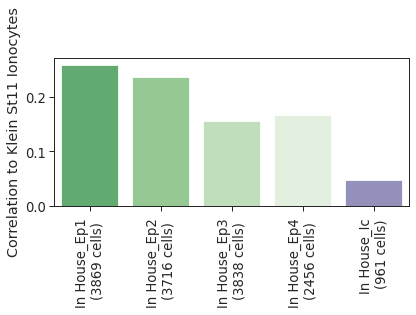

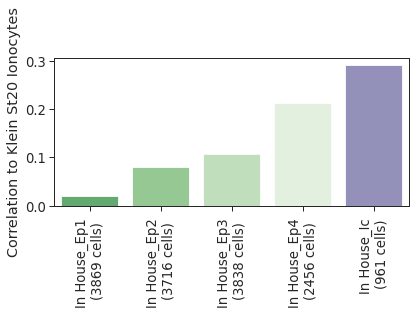

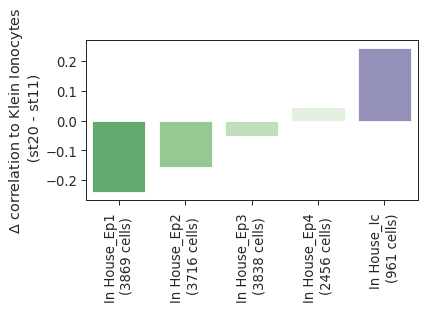

In [58]:
ion_early = spearman.loc[spearman.index.str.startswith('Klein') & spearman.index.str.endswith('ionocyte'),spearman.index.str.startswith('In House')].loc['Klein_S11-ionocyte']
ion_early.index = ['{} \n({} cells)'.format(x, str(anno.groupby('new_name').count()['Clusters'][x])) for x in ion_early.index]
sns.barplot(x = ion_early.index, y = ion_early, order = colors.iloc[ic_col].new_name2, palette = colors.iloc[ic_col].color
)
plt.xticks(rotation=90)
plt.ylabel('Correlation to Klein St11 Ionocytes')
plt.tight_layout()
plt.savefig('Figures2/Ion_st11_map.pdf')
plt.show()

ion_late = spearman.loc[spearman.index.str.startswith('Klein') & spearman.index.str.endswith('ionocyte'),spearman.index.str.startswith('In House')].loc['Klein_S20-ionocyte']
ion_late.index = ['{} \n({} cells)'.format(x, str(anno.groupby('new_name').count()['Clusters'][x])) for x in ion_late.index]

sns.barplot(x = ion_late.index, y = ion_late,  order = colors.iloc[ic_col].new_name2, palette = colors.iloc[ic_col].color
)
plt.xticks(rotation=90)
plt.ylabel('Correlation to Klein St20 Ionocytes')
plt.tight_layout()
plt.savefig('Figures2/Ion_st20_map.pdf')
plt.show()

tmp = ion_late - ion_early
sns.barplot(x = tmp.index, y = tmp, order = colors.iloc[ic_col].new_name2, palette = colors.iloc[ic_col].color
)
plt.ylabel('$\Delta$ correlation to Klein Ionocytes \n (st20 - st11)' )
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/Ion_diff_map.pdf')
plt.show()

## Correlation to Goblet cells

In [242]:
test = spearman.loc[spearman.index.str.startswith('Klein') & spearman.index.str.endswith('goblet cell'),
                              ['In House_Ep1','In House_Ep2','In House_Ep3','In House_Ep4', 'In House_Gc']]

test['Stage'] = [int(x.split('_')[1][1:].split('-')[0]) for x in test.index]


In [59]:
eps_c = np.append(np.array(test['In House_Ep1']), [np.array(test['In House_Ep2']), np.array(test['In House_Ep3']), np.array(test['In House_Ep4'])])
eps_m = np.append(np.array(test.Stage), [np.array(test.Stage), np.array(test.Stage),np.array(test.Stage)])

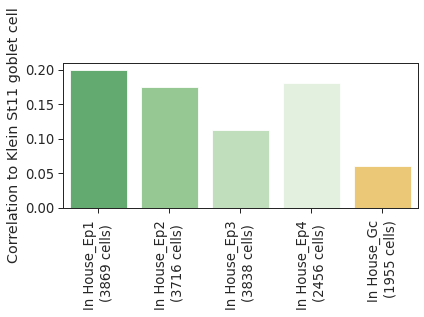

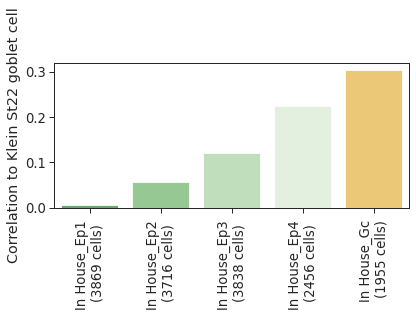

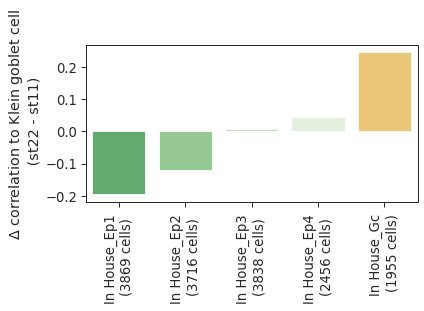

In [60]:
ion_early = spearman.loc[spearman.index.str.startswith('Klein') & spearman.index.str.endswith('goblet cell'),spearman.index.str.startswith('In House')].loc['Klein_S11-goblet cell']
ion_early.index = ['{} \n({} cells)'.format(x, str(anno.groupby('new_name').count()['Clusters'][x])) for x in ion_early.index]

sns.barplot(x = ion_early.index, y = ion_early, order = colors.iloc[gc_col].new_name2, palette = colors.iloc[gc_col].color
)
plt.xticks(rotation=90)
plt.ylabel('Correlation to Klein St11 goblet cell')
plt.tight_layout()
plt.savefig('Figures2/Gob_st11_map.pdf')
plt.show()

ion_late = spearman.loc[spearman.index.str.startswith('Klein') & spearman.index.str.endswith('goblet cell'),spearman.index.str.startswith('In House')].loc['Klein_S22-goblet cell']
ion_late.index = ['{} \n({} cells)'.format(x, str(anno.groupby('new_name').count()['Clusters'][x])) for x in ion_late.index]

sns.barplot(x = ion_late.index, y = ion_late, order = colors.iloc[gc_col].new_name2, palette = colors.iloc[gc_col].color
)
plt.xticks(rotation=90)
plt.ylabel('Correlation to Klein St22 goblet cell')
plt.tight_layout()
plt.savefig('Figures2/Gob_st22_map.pdf')
plt.show()
tmp = ion_late - ion_early
sns.barplot(x = tmp.index, y = tmp, order = colors.iloc[gc_col].new_name2, palette = colors.iloc[gc_col].color
)
plt.ylabel('$\Delta$ correlation to Klein goblet cell \n (st22 - st11)' )
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/Gob_diff_map.pdf')
plt.show()

## Correlation to Multicilliated cells

In [246]:
test = spearman.loc[spearman.index.str.startswith('Klein') & spearman.index.str.endswith('progenitor'),
                              ['In House_Ep1','In House_Ep2','In House_Ep3','In House_Ep4', 'In House_Mcc/CCPs', 'In House_Mcc2', 'In House_Mcc3']]

test['Stage'] = [int(x.split('_')[1][1:].split('-')[0]) for x in test.index]


In [61]:
eps_c = np.append(np.array(test['In House_Ep1']), [np.array(test['In House_Ep2']), np.array(test['In House_Ep3']), np.array(test['In House_Ep4'])])
eps_m = np.append(np.array(test.Stage), [np.array(test.Stage), np.array(test.Stage),np.array(test.Stage)])

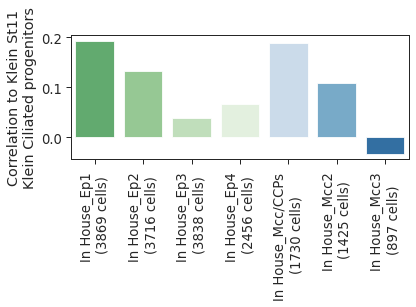

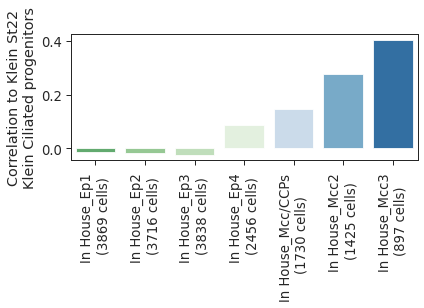

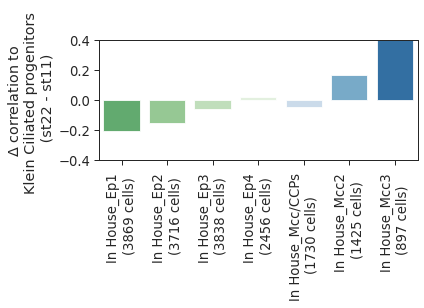

In [63]:
ion_early = spearman.loc[spearman.index.str.startswith('Klein') & spearman.index.str.endswith('progenitor'),spearman.index.str.startswith('In House')].loc['Klein_S11-ciliated epidermal progenitor']
ion_early.index = ['{} \n({} cells)'.format(x, str(anno.groupby('new_name').count()['Clusters'][x])) for x in ion_early.index]

sns.barplot(x = ion_early.index, y = ion_early, order = colors.iloc[mcc_col].new_name2, palette = colors.iloc[mcc_col].color
)
plt.xticks(rotation=90)
plt.ylabel('Correlation to Klein St11\nKlein Ciliated progenitors')
plt.tight_layout()
plt.savefig('Figures2/mcc_st11_map.pdf')
plt.show()
ion_late = spearman.loc[spearman.index.str.startswith('Klein') & spearman.index.str.endswith('progenitor'),spearman.index.str.startswith('In House')].loc['Klein_S22-ciliated epidermal progenitor']
ion_late.index = ['{} \n({} cells)'.format(x, str(anno.groupby('new_name').count()['Clusters'][x])) for x in ion_late.index]

sns.barplot(x = ion_late.index, y = ion_late, order = colors.iloc[mcc_col].new_name2, palette = colors.iloc[mcc_col].color
)
plt.xticks(rotation=90)
plt.ylabel('Correlation to Klein St22\nKlein Ciliated progenitors')
plt.tight_layout()
plt.savefig('Figures2/mcc_st22_map.pdf')
plt.show()
tmp = ion_late - ion_early
sns.barplot(x = tmp.index, y = tmp, order = colors.iloc[mcc_col].new_name2, palette = colors.iloc[mcc_col].color
)
plt.ylabel('$\Delta$ correlation to\nKlein Ciliated progenitors \n (st22 - st11)' )
plt.xticks(rotation=90)
plt.ylim(-0.4, .4)
plt.tight_layout()
plt.savefig('Figures2/mcc_diff_map.pdf')
plt.show()

## Double possitive for ionocyte and goblet gene sets

In [86]:
f = open("de_genes.pkl","rb")
de_genes = pickle.load(f)

In [87]:
def find_common_enrich(klein = 'Klein_ionocyte', inhouse = 'In House_Ic'):
    k = round(len(de_genes[klein])/5)
    i = round(len(de_genes[inhouse])/5)
    return list(set(de_genes[klein][:k]).intersection(set(de_genes[inhouse][:i])))

In [88]:
ic_genes = find_common_enrich(klein = 'Klein_ionocyte', inhouse = 'In House_Ic')
gc_genes = find_common_enrich(klein = 'Klein_goblet cell', inhouse = 'In House_Gc')


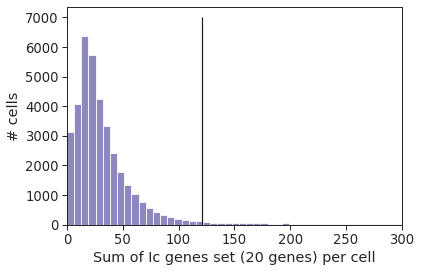

In [134]:
sns.distplot(klein_c[ic_genes].sum(axis = 1), kde = False, bins = 80, color = colors.iloc[11].color, hist_kws=dict(alpha=1))
plt.xlim(0, 300)
plt.xlabel('Sum of Ic genes set (20 genes) per cell')
plt.ylabel('# cells')
plt.vlines(x = np.percentile(klein_c[ic_genes].sum(axis = 1), percentile_i), ymin = 0, ymax = 7000)
plt.savefig('Figures2/gob_marker_threshold.pdf')

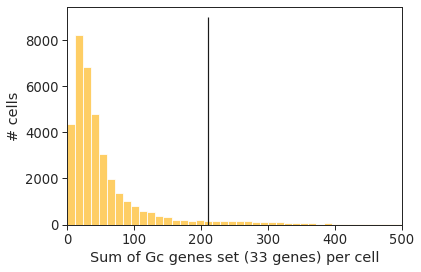

In [135]:
sns.distplot(klein_c[gc_genes].sum(axis = 1), kde = False, bins = 100, color = colors.iloc[8].color, hist_kws=dict(alpha=1))
plt.xlim(0, 500)
plt.xlabel('Sum of Gc genes set (33 genes) per cell')
plt.ylabel('# cells')
plt.vlines(x = np.percentile(klein_c[gc_genes].sum(axis = 1), percentile_g), ymin = 0, ymax = 9000)
plt.savefig('Figures2/ion_marker_threshold.pdf')

In [80]:
def compute_prob_set(data, meta, gene_sets = [['FOXI1', 'ATP6V1C1'], ['ITLN1', 'OTOGL']], stage_label = 'Stage', min_count_1 = 0, min_count_2 = 0):

    prob = pd.DataFrame(index = meta[stage_label].unique(), columns = ['Probability'])
    for i in meta[stage_label].unique():
        sub = data.loc[meta[meta[stage_label] == i].index].copy()
        prob.loc[i, 'Probability'] = (1- sum(sub[gene_sets[0]].mean(axis = 1) <= min_count_1 ) / len(sub[gene_sets[0]])) * (1 - sum(sub[gene_sets[1]].mean(axis = 1) <= min_count_2) / len(sub[gene_sets[1]].sum(axis = 1)))
    prob = prob + 0.000000000000000000000001
    return prob


In [81]:
1-(sum(anno.Clusters  == '8') / len(anno.Clusters)) #Gc

0.9424830832597823

In [82]:
1-(sum(anno.Clusters  == '11') / len(anno.Clusters)) #Ic

0.971726978523095

In [83]:
percentile_g = (1-(sum(anno.Clusters  == '8') / len(anno.Clusters)))*100
percentile_i = (1-(sum(anno.Clusters  == '11') / len(anno.Clusters)))*100

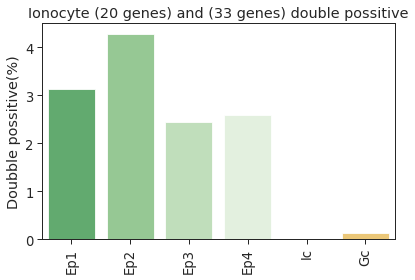

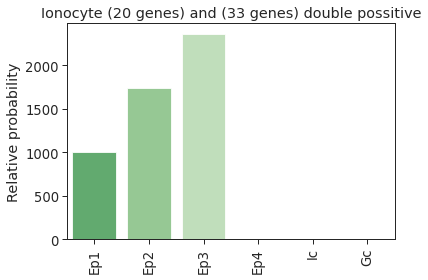

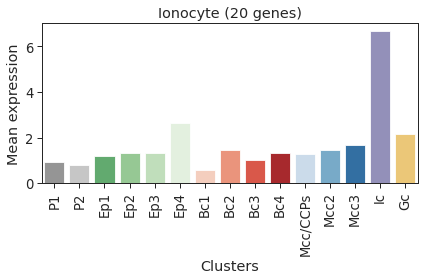

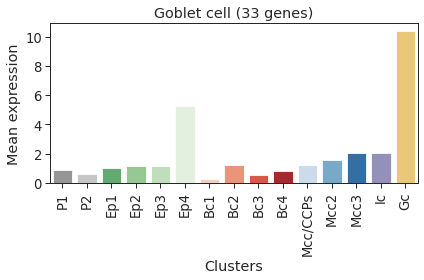

In [120]:
min_count_i = np.percentile(counts[ic_genes].mean(axis = 1), percentile_i)
min_count_g = np.percentile(counts[gc_genes].mean(axis = 1), percentile_g)


anno['double_pos'] = (counts[ic_genes].mean(axis = 1) > min_count_i) & (counts[gc_genes].mean(axis = 1) > min_count_g) 
anno['either'] = (counts[ic_genes].mean(axis = 1) > min_count_i) | (counts[gc_genes].mean(axis = 1) > min_count_g) 


anno['Ion_set'] = counts[ic_genes].mean(axis = 1)
anno['Gob_set'] = counts[gc_genes].mean(axis = 1)
exp = anno.groupby('Clusters').mean()
test = pd.DataFrame(anno.groupby(['Clusters', 'double_pos']).count()['Stage']).reset_index().pivot_table(index='Clusters', columns='double_pos', values='Stage')
eith = pd.DataFrame(anno.groupby(['Clusters', 'either']).count()['Stage']).reset_index().pivot_table(index='Clusters', columns='either', values='Stage')
test[False] = eith[True]
test.columns = ['either', 'Double_positive']
test = test.div(test['either'],axis = 0) 
test.columns = ['either', 'Double_positive']

prob = compute_prob_set(counts, anno, gene_sets = [ic_genes, gc_genes], stage_label = 'Clusters', min_count_1 = min_count_i, min_count_2 = min_count_g)
test = pd.concat([test, prob], axis = 1)
test['Relative_prob'] = test.Double_positive / test.Probability

test.index = test.index.map({ '7': 'P1','4': 'P2','0': 'Ep1' ,'2': 'Ep2','1': 'Ep3','5':'Ep4',   
                                                              '14': 'Bc1','12': 'Bc2','6': 'Bc3','3' : 'Bc4',
                                                              '9' : 'Mcc/CCPs','10' : 'Mcc2','13' : 'Mcc3',
                                                              '11': 'Ic',
                                                              '8': 'Gc' })

exp.index = exp.index.map({ '7': 'P1','4': 'P2','0': 'Ep1' ,'2': 'Ep2','1': 'Ep3','5':'Ep4',   
                                                              '14': 'Bc1','12': 'Bc2','6': 'Bc3','3' : 'Bc4',
                                                              '9' : 'Mcc/CCPs','10' : 'Mcc2','13' : 'Mcc3',
                                                              '11': 'Ic',
                                                              '8': 'Gc' })

col_sub = colors.iloc[[0, 2, 1, 5, 11, 8]]
sns.barplot(x = test.index, y = test.Double_positive* 100, order = col_sub.sort_values('clust_order').org_clust, palette = col_sub.sort_values('clust_order').color)


plt.ylabel('Doubble possitive(%)' )
plt.title('Ionocyte ({} genes) and ({} genes) double possitive'.format(len(ic_genes), len(gc_genes)))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/inhouse_double_pos.pdf')
plt.show()

sns.barplot(x = test.index, y = test.Relative_prob, order = col_sub.sort_values('clust_order').org_clust, palette = col_sub.sort_values('clust_order').color)


plt.ylabel('Relative probability' )
plt.title('Ionocyte ({} genes) and ({} genes) double possitive'.format(len(ic_genes), len(gc_genes)))
plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('Figures/inhouse_double_pos.pdf')
plt.show()

sns.barplot(x = exp.index, y = exp.Ion_set, order = colors.sort_values('clust_order').org_clust, palette = colors.sort_values('clust_order').color)


plt.ylabel('Mean expression' )
plt.title('Ionocyte ({} genes)'.format(len(ic_genes)))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/inhouse_ic_exp.pdf')
plt.show()

sns.barplot(x = exp.index, y = exp.Gob_set, order = colors.sort_values('clust_order').org_clust, palette = colors.sort_values('clust_order').color)

plt.ylabel('Mean expression' )
plt.title('Goblet cell ({} genes)'.format(len(gc_genes)))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/inhouse_gc_exp.pdf')
plt.show()

In [122]:
klein_m['ion'] = klein_m.Cluster_name.str.endswith('ionocyte')
klein_m['gob'] = klein_m.Cluster_name.str.endswith('goblet cell')

In [43]:
percentile_g = (1-(sum(klein_m.gob) / len(klein_m.gob)))*100
percentile_i = (1-(sum(klein_m.ion) / len(klein_m.ion)))*100

In [116]:
klein_m['Developmental_stage'] = klein_m.Developmental_stage.map(
{'Stage_8':'Blastula', 
 'Stage_10':'Gastrula', 
 'Stage_11':'Gastrula', 
 'Stage_12':'Gastrula', 
 'Stage_13':'Neurula', 
 'Stage_14':'Neurula', 
 'Stage_16':'Neurula', 
 'Stage_18':'Neurula', 
 'Stage_20':'Neurula', 
 'Stage_22':'Early tailbud'})

In [117]:
cou = sub_m.groupby('Dev_group').count()['InDrops_version']
sub_m['Dev_group'] = ['{} \n({} cells)'.format(x, cou[x]) for x in sub_m['Dev_group']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

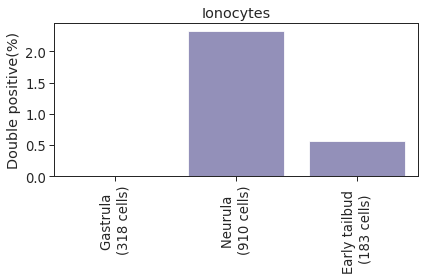

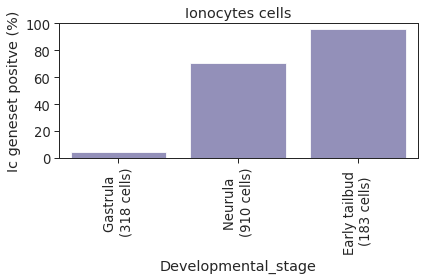

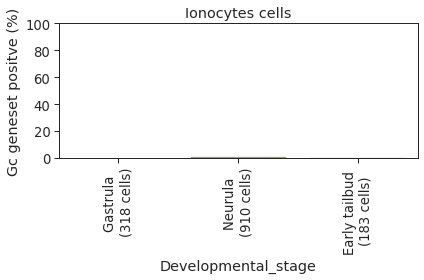

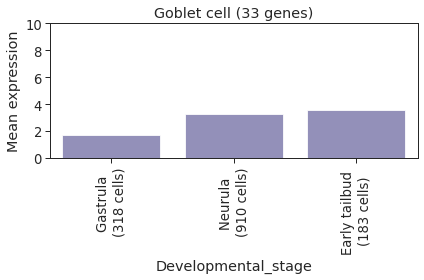

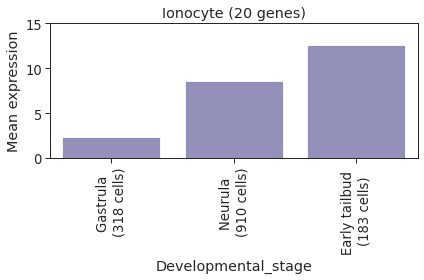

In [143]:
min_count_i = np.percentile(klein_c[ic_genes].mean(axis = 1), percentile_i)
min_count_g = np.percentile(klein_c[gc_genes].mean(axis = 1), percentile_g)

klein_m['single_pos_Ic'] = klein_c[ic_genes].mean(axis = 1) > min_count_i
klein_m['single_pos_Gc'] = klein_c[gc_genes].mean(axis = 1) > min_count_g


klein_m['double_pos'] = (klein_c[ic_genes].mean(axis = 1) > min_count_i) & (klein_c[gc_genes].mean(axis = 1) > min_count_g) 
klein_m['either'] = (klein_c[ic_genes].mean(axis = 1) > min_count_i) | (klein_c[gc_genes].mean(axis = 1) > min_count_g) 

sub_m = klein_m[klein_m.ion]
sub_c = klein_c.loc[klein_m.ion]

cou = sub_m.groupby('Dev_group').count()['InDrops_version']
sub_m['Developmental_stage'] = ['{} \n({} cells)'.format(x, cou[x]) for x in sub_m['Developmental_stage']]

sub_m['Ion_set'] = sub_c[ic_genes].mean(axis = 1)
sub_m['Gob_set'] = sub_c[gc_genes].mean(axis = 1)
exp = sub_m.groupby('Developmental_stage').mean()
exp_ic = exp.copy()


test = pd.DataFrame(sub_m.groupby(['Developmental_stage', 'double_pos']).count()['Barcode_name']).reset_index().pivot_table(index='Developmental_stage', columns='double_pos', values='Barcode_name')
eith = pd.DataFrame(sub_m.groupby(['Developmental_stage', 'either']).count()['Barcode_name']).reset_index().pivot_table(index='Developmental_stage', columns='either', values='Barcode_name')
test[False] = eith[True]
test.columns = ['either', 'Double_positive']
test = test.div(test['either'],axis = 0) 
test.columns = ['either', 'Double_positive']



ic_pos = pd.DataFrame(sub_m.groupby(['Developmental_stage', 'single_pos_Ic']).count()['Barcode_name']).reset_index().pivot_table(index='Developmental_stage', columns='single_pos_Ic', values='Barcode_name')
ic_pos = ic_pos.div(ic_pos.sum(axis = 1),axis = 0) 
ic_pos.columns = ['Negative', 'Possitive']
gc_pos = pd.DataFrame(sub_m.groupby(['Developmental_stage', 'single_pos_Gc']).count()['Barcode_name']).reset_index().pivot_table(index='Developmental_stage', columns='single_pos_Gc', values='Barcode_name')
gc_pos = gc_pos.div(gc_pos.sum(axis = 1),axis = 0) 
gc_pos.columns = ['Negative', 'Possitive']



prob = compute_prob_set(sub_c, sub_m, gene_sets = [ic_genes, gc_genes], stage_label = 'Developmental_stage')#, min_count_1 = min_count_i, min_count_2 = min_count_g)
test = pd.concat([test, prob], axis = 1)
test['Relative_prob'] = test.Double_positive / test.Probability

sns.barplot(x = test.index, y = test.Double_positive* 100, order = ['Gastrula \n(318 cells)','Neurula \n(910 cells)', 'Early tailbud \n(183 cells)'], color = colors.iloc[11].color)

plt.ylabel('Double positive(%)' )
plt.title('Ionocytes' )
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/Ion_double_pos.pdf')
plt.show()




sns.barplot(x = ic_pos.index, y = ic_pos.Possitive* 100, order = ['Gastrula \n(318 cells)','Neurula \n(910 cells)', 'Early tailbud \n(183 cells)'], color = colors.iloc[11].color)
plt.ylabel('Ic geneset positve (%)' )
plt.title('Ionocytes cells' )
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.tight_layout()
plt.savefig('Figures2/Ion_ic_pos.pdf')
plt.show()
sns.barplot(x = gc_pos.index, y = gc_pos.Possitive* 100, order = ['Gastrula \n(318 cells)','Neurula \n(910 cells)', 'Early tailbud \n(183 cells)'], color = colors.iloc[11].color)
plt.ylabel('Gc geneset positve (%)' )
plt.title('Ionocytes cells' )
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.tight_layout()
plt.savefig('Figures2/Ion_gc_pos.pdf')
plt.show()






sns.barplot(x = exp.index, y = exp.Gob_set, order = ['Gastrula \n(318 cells)','Neurula \n(910 cells)', 'Early tailbud \n(183 cells)'], color = colors.iloc[11].color)

plt.ylabel('Mean expression' )
plt.title('Goblet cell ({} genes)'.format(len(gc_genes)))
plt.ylim(0,10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/Ion_gc_mean_exp.pdf')
plt.show()

sns.barplot(x = exp.index, y = exp.Ion_set, order = ['Gastrula \n(318 cells)','Neurula \n(910 cells)', 'Early tailbud \n(183 cells)'], color = colors.iloc[11].color)

plt.ylabel('Mean expression' )
plt.title('Ionocyte ({} genes)'.format(len(ic_genes)))
plt.ylim(0,15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/Ion_ic_mean_exp.pdf')
plt.show()

In [ ]:
min_count_i = np.percentile(klein_c[ic_genes].mean(axis = 1), percentile_i)
min_count_g = np.percentile(klein_c[gc_genes].mean(axis = 1), percentile_g)

klein_m['double_pos'] = (klein_c[ic_genes].mean(axis = 1) > min_count_i) & (klein_c[gc_genes].mean(axis = 1) > min_count_g) 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

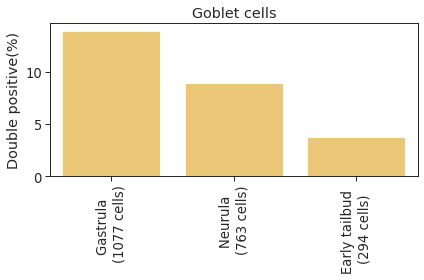

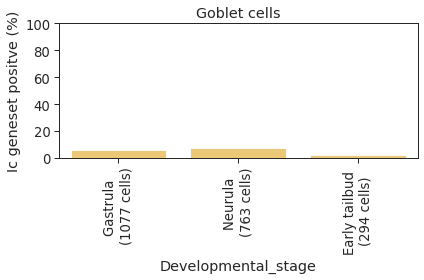

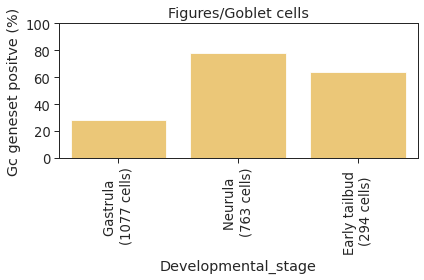

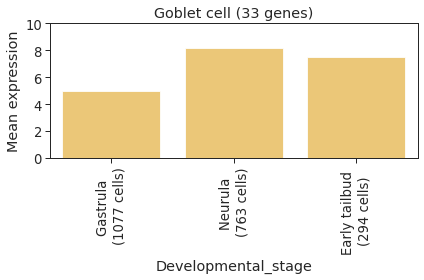

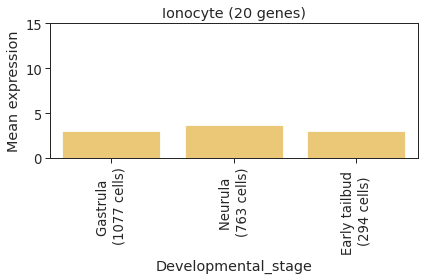

In [144]:
min_count_i = np.percentile(klein_c[ic_genes].mean(axis = 1), percentile_i)
min_count_g = np.percentile(klein_c[gc_genes].mean(axis = 1), percentile_g)

klein_m['double_pos'] = (klein_c[ic_genes].mean(axis = 1) > min_count_i) & (klein_c[gc_genes].mean(axis = 1) > min_count_g) 
klein_m['either'] = (klein_c[ic_genes].mean(axis = 1) > min_count_i) | (klein_c[gc_genes].mean(axis = 1) > min_count_g) 



klein_m['single_pos_Ic'] = klein_c[ic_genes].mean(axis = 1) > min_count_i
klein_m['single_pos_Gc'] = klein_c[gc_genes].mean(axis = 1) > min_count_g


sub_m = klein_m[klein_m.gob]
sub_c = klein_c.loc[klein_m.gob]

cou = sub_m.groupby('Dev_group').count()['InDrops_version']
sub_m['Developmental_stage'] = ['{} \n({} cells)'.format(x, cou[x]) for x in sub_m['Developmental_stage']]




sub_m['Ion_set'] = sub_c[ic_genes].mean(axis = 1)
sub_m['Gob_set'] = sub_c[gc_genes].mean(axis = 1)
exp = sub_m.groupby('Developmental_stage').mean()
exp_gob = exp.copy()

test = pd.DataFrame(sub_m.groupby(['Developmental_stage', 'double_pos']).count()['Barcode_name']).reset_index().pivot_table(index='Developmental_stage', columns='double_pos', values='Barcode_name')

eith = pd.DataFrame(sub_m.groupby(['Developmental_stage', 'either']).count()['Barcode_name']).reset_index().pivot_table(index='Developmental_stage', columns='either', values='Barcode_name')
test[False] = eith[True]
test.columns = ['either', 'Double_positive']
test = test.div(test['either'],axis = 0) 
test.columns = ['either', 'Double_positive']


ic_pos = pd.DataFrame(sub_m.groupby(['Developmental_stage', 'single_pos_Ic']).count()['Barcode_name']).reset_index().pivot_table(index='Developmental_stage', columns='single_pos_Ic', values='Barcode_name')
ic_pos = ic_pos.div(ic_pos.sum(axis = 1),axis = 0) 
ic_pos.columns = ['Negative', 'Possitive']
gc_pos = pd.DataFrame(sub_m.groupby(['Developmental_stage', 'single_pos_Gc']).count()['Barcode_name']).reset_index().pivot_table(index='Developmental_stage', columns='single_pos_Gc', values='Barcode_name')
gc_pos = gc_pos.div(gc_pos.sum(axis = 1),axis = 0) 
gc_pos.columns = ['Negative', 'Possitive']

prob = compute_prob_set(sub_c, sub_m, gene_sets = [ic_genes, gc_genes], stage_label = 'Developmental_stage')#, min_count_1 = min_count_i, min_count_2 = min_count_g)
test = pd.concat([test, prob], axis = 1)
test['Relative_prob'] = test.Double_positive / test.Probability





sns.barplot(x = test.index, y = test.Double_positive* 100, order = [ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)'], color = colors.iloc[8].color)
plt.ylabel('Double positive(%)' )
plt.title('Goblet cells' )
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/gob_double_pos.pdf')

plt.show()

sns.barplot(x = ic_pos.index, y = ic_pos.Possitive* 100, order = [ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)'], color = colors.iloc[8].color)
plt.ylabel('Ic geneset positve (%)' )
plt.title('Goblet cells' )
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.tight_layout()
plt.savefig('Figures2/gob_ic_pos.pdf')

plt.show()
sns.barplot(x = gc_pos.index, y = gc_pos.Possitive* 100, order = [ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)'], color = colors.iloc[8].color)
plt.ylabel('Gc geneset positve (%)' )
plt.title('Figures/Goblet cells' )
plt.xticks(rotation=90)
plt.ylim(0,100)
plt.tight_layout()
plt.savefig('Figures2/gob_gc_pos.pdf')


plt.show()








sns.barplot(x = exp.index, y = exp.Gob_set, order = [ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)'], color = colors.iloc[8].color)

plt.ylabel('Mean expression' )
plt.ylim(0,10)
plt.title('Goblet cell ({} genes)'.format(len(gc_genes)))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/gob_gc_mean_exp.pdf')


plt.show()

sns.barplot(x = exp.index, y = exp.Ion_set, order = [ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)'], color = colors.iloc[8].color)

plt.ylabel('Mean expression' )
plt.title('Ionocyte ({} genes)'.format(len(ic_genes)))
plt.ylim(0,15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/gob_ic_mean_exp.pdf')

plt.show()

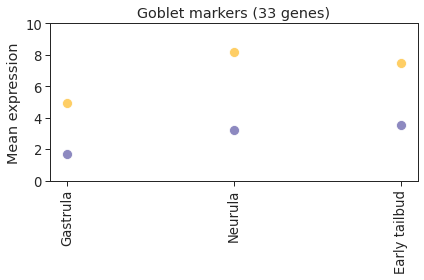

In [168]:
sns.scatterplot(x = [ 'Gastrula','Neurula', 'Early tailbud'], 
                y = exp_gob.Gob_set[[ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)']],# order = [ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)'], 
                color = colors.iloc[8].color, s = 100)

sns.scatterplot(x = [ 'Gastrula','Neurula', 'Early tailbud'], 
                y = exp_ic.Gob_set[[  'Gastrula \n(318 cells)', 'Neurula \n(910 cells)','Early tailbud \n(183 cells)']],# order = [ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)'], 
                color = colors.iloc[11].color, s = 100)

plt.ylabel('Mean expression' )
plt.ylim(0,10)
plt.title('Goblet markers ({} genes)'.format(len(gc_genes)))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/goblet_markers_mean_exp.pdf')

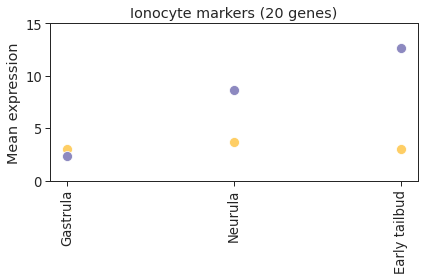

In [169]:
sns.scatterplot(x = [ 'Gastrula','Neurula', 'Early tailbud'], 
                y = exp_gob.Ion_set[[ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)']],# order = [ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)'], 
                color = colors.iloc[8].color, s = 100)

sns.scatterplot(x = [ 'Gastrula','Neurula', 'Early tailbud'], 
                y = exp_ic.Ion_set[[  'Gastrula \n(318 cells)', 'Neurula \n(910 cells)','Early tailbud \n(183 cells)']],# order = [ 'Gastrula \n(1077 cells)','Neurula \n(763 cells)', 'Early tailbud \n(294 cells)'], 
                color = colors.iloc[11].color, s = 100)

plt.ylabel('Mean expression' )
plt.ylim(0,15)
plt.title('Ionocyte markers ({} genes)'.format(len(ic_genes)))
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Figures2/ion_markers_mean_exp.pdf')

In [144]:
klein_m['ion'] = klein_m.Cluster_name.str.endswith('ionocyte')
klein_m['gob'] = klein_m.Cluster_name.str.endswith('goblet cell')

In [145]:
klein_m['Developmental_stage'] = klein_m.Developmental_stage.map(
{'Stage_8':'Blastula', 
 'Stage_10':'Gastrula', 
 'Stage_11':'Gastrula', 
 'Stage_12':'Gastrula', 
 'Stage_13':'Neurula', 
 'Stage_14':'Neurula', 
 'Stage_16':'Neurula', 
 'Stage_18':'Neurula', 
 'Stage_20':'Neurula', 
 'Stage_22':'Early tailbud'})

In [192]:
sub_m = klein_m[klein_m.gob |klein_m.ion]
sub_c = klein_c.loc[klein_m.gob |klein_m.ion]

In [194]:
adata = sc.AnnData(sub_c)
adata.obs = sub_m
adata.obs_names_make_unique()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [195]:
sc.pp.log1p(adata)

In [196]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


In [197]:
adata.raw = adata

In [198]:
adata = adata[:, adata.var.highly_variable]

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [199]:
sc.pp.scale(adata, max_value=10)

/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [200]:
sc.tl.pca(adata, svd_solver='arpack')

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'InDrops_version' as categorical
... storing 'Replicate_name' as categorical
... storing 'Clutch_name' as categorical
... storing 'Library_name' as categorical
... storing 'Barcode_name' as categorical
... storing 'Developmental_stage' as categorical
... storing 'Cluster_name' as categorical
... storing 'Parent_cluster_name' as categorical
... storing 'Dev_group' as categorical
... storing 'Cluster_name_simple' as categorical
... storing 'Cell-type' as categorical
... storing 'Dataset' as categorical
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array

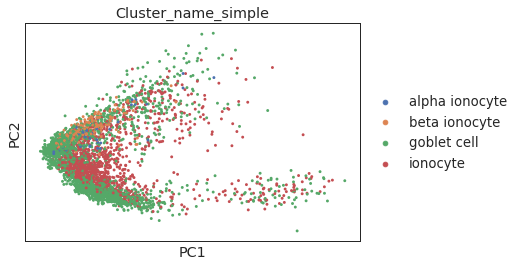

In [201]:
sc.pl.pca(adata, color='Cluster_name_simple')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


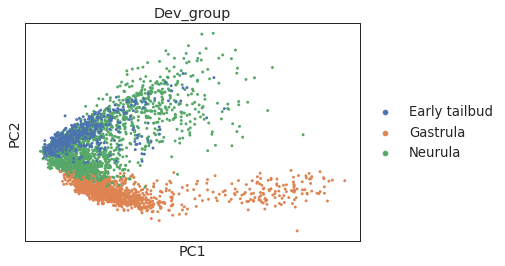

In [202]:
sc.pl.pca(adata, color='Dev_group')

In [203]:
adata.obs['Stage'] = [x.split('-')[0] for x in adata.obs['Cluster_name']]

... storing 'Stage' as categorical
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argumen

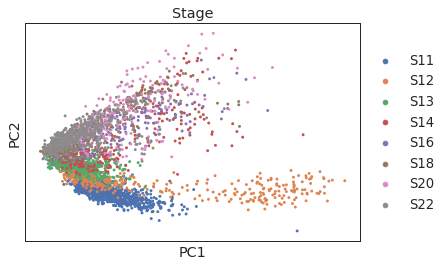

In [204]:
sc.pl.pca(adata, color='Stage')

In [205]:
adata.obs['Double Possitive'] = adata.obs.double_pos.map({False: 'Single possitive or not possitive', True:'Double possitive'})
adata.obs['Ic Possitive'] = adata.obs.single_pos_Ic.map({False: 'Negative', True:'Possitive'})
adata.obs['Gc Possitive'] = adata.obs.single_pos_Gc.map({False: 'Negative', True:'Possitive'})


... storing 'Double Possitive' as categorical
... storing 'Ic Possitive' as categorical
... storing 'Gc Possitive' as categorical
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


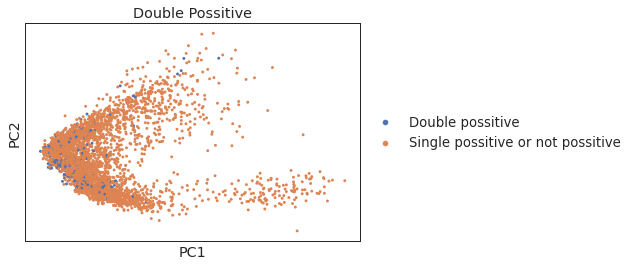

In [206]:
sc.pl.pca(adata, color='Double Possitive')

In [207]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


In [208]:
sc.tl.umap(adata)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

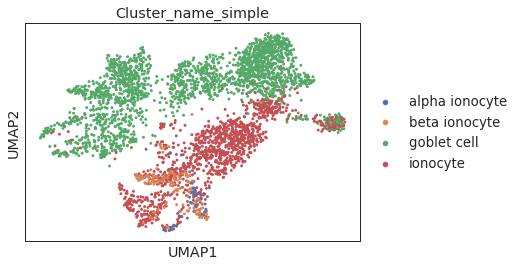

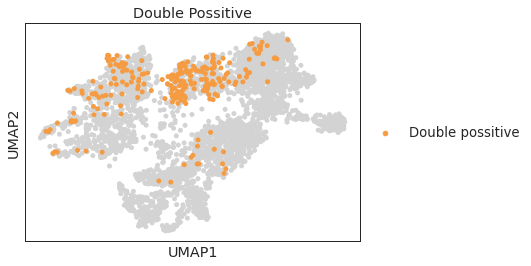

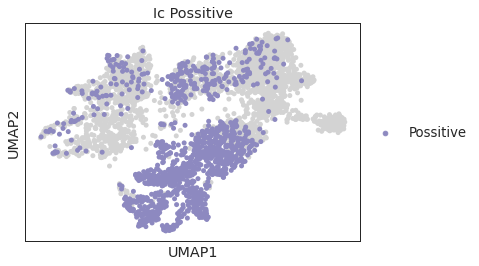

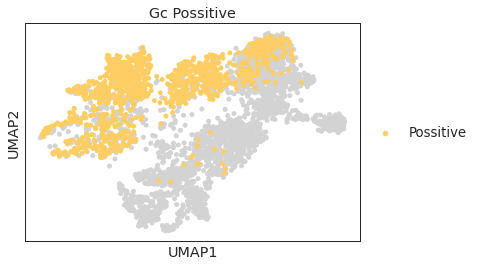

In [215]:
sc.pl.umap(adata, color='Cluster_name_simple', save = 'Klein_NNE_cell-types.pdf')


for batch in ['Double possitive']:
    sc.pl.umap(adata, color='Double Possitive', groups=[batch], size = 100, palette = ['#f59c42'], save = 'Klein_NNE_double_pos.pdf')

    
for batch in ['Possitive']:
    sc.pl.umap(adata, color='Ic Possitive', groups=[batch], size = 100, palette = [colors.iloc[11].color], save = 'Klein_NNE_ic_pos.pdf')

    
for batch in ['Possitive']:
    sc.pl.umap(adata, color='Gc Possitive', groups=[batch], size = 100, palette = [colors.iloc[8].color], save = 'Klein_NNE_gc_pos.pdf')


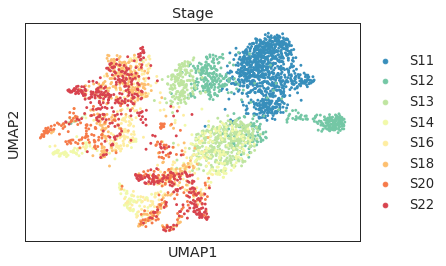

In [217]:
sc.pl.umap(adata, color='Stage', palette = sns.color_palette("Spectral", 8)[::-1], save = 'Klein_NNE_stage.pdf')